The data required for this analysis is downloaded from the Labour market information portal. From the data available, employment by industry for the month november has been used.

Data from the website is read and information on the Tech industry is filtered. The column names are cleaned and the data is visualised using matplotlib.

From the charts we can infer that men occupy more than 50 percent of the jobs in australia and New south wales seems to be the employment hub especially sydney followed by melbourne.



In [63]:
#Package import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
url1="https://lmip.gov.au/PortalFile.axd?FieldID=3195450&.xlsx"

In [30]:
#Reading data
data = pd.read_excel(url1, sheet_name="SA4 based regions")

In [8]:
#Filtering only tech industry
df = data.query("Industry=='Information Media and Telecommunications'")

In [9]:
#Viewing data
df.head()

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
9,Capital Region,NSW/ACT,Information Media and Telecommunications,4500,3400,1100,2300,2200,600,1.3
28,Central West,NSW,Information Media and Telecommunications,400,400,0,200,100,-100,0.3
47,Far West Orana,NSW,Information Media and Telecommunications,100,100,0,0,100,100,0.2
66,Hunter,NSW,Information Media and Telecommunications,1000,700,300,600,400,-1100,0.3
85,Illawarra South Coast,NSW,Information Media and Telecommunications,4900,4200,700,2700,2200,1200,2.1


In [10]:
df.shape

(46, 10)

DATA CLEANING

In [11]:
#Renaming column names
df.columns = ['Region', 'State', 'Industry',
       'EmploymentTotal', 'EmployedFullTime',
       'EmployedPartTime', 'EmployedMale', 'EmployedFemale',
       'FiveYearGrowth', 'EmploymentDistribution']

In [12]:
#checking data distribution
df.describe()

,EmploymentTotal,EmployedFullTime,EmployedPartTime,EmployedMale,EmployedFemale,FiveYearGrowth,EmploymentDistribution
count,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000
mean,8245.652174,6345.652174,1721.73913,4413.043478,3695.652174,-915.217391,1.045652
std,28476.756264,21419.520759,5893.91072,14694.497968,12921.953009,3736.544297,0.709838
min,0.000000,0.000000,0.00000,0.000000,0.000000,-23800.000000,0.000000
25%,600.000000,425.000000,125.00000,200.000000,300.000000,-1275.000000,0.500000
50%,1500.000000,1250.000000,350.00000,950.000000,600.000000,-400.000000,0.900000
75%,4900.000000,3900.000000,1200.00000,2875.000000,2275.000000,475.000000,1.475000
max,192500.000000,144300.000000,40000.00000,99400.000000,87000.000000,2600.000000,2.900000


In [13]:
#Checking for null/missing values
df.isnull().sum()

Region                    0
State                     0
Industry                  0
EmploymentTotal           0
EmployedFullTime          0
EmployedPartTime          0
EmployedMale              0
EmployedFemale            0
FiveYearGrowth            0
EmploymentDistribution    0
dtype: int64

In [14]:
#Checking unique values because of huge std and low percentile value
np.unique(df["Region"])

array(['Adelaide North', 'Adelaide South', 'Australia', 'Ballarat',
       'Barwon', 'Bendigo', 'Brisbane South East', 'Cairns',
       'Capital Region', 'Central West', 'Darling Downs', 'Darwin',
       'Far West Orana', 'Fitzroy', 'Gippsland', 'Gold Coast',
       'Goulburn/Murray', 'Great Southern - Wheatbelt',
       'Hobart and Southern Tasmania', 'Hunter', 'Illawarra South Coast',
       'Inner Metropolitan Melbourne', 'Mackay', 'Mid North Coast',
       'Mid North SA', 'Murray Riverina', 'Murray and South East',
       'New England and North West', 'North Eastern Melbourne',
       'North Western Melbourne', 'North and North Western Tasmania',
       'Perth North', 'Perth South', 'Somerset',
       'South Coast of Victoria', 'South Eastern Melbourne and Peninsula',
       'South West WA', 'Sydney East Metro', 'Sydney Greater West',
       'Sydney North and West', 'Sydney South West', 'Townsville',
       'Western Melbourne', 'Wide Bay and Sunshine Coast',
       'Wimmera Mallee'

In [15]:
#australia total
aus_df = df[df['Region']=="Australia"]
aus_df.head()

,Region,State,Industry,EmploymentTotal,EmployedFullTime,EmployedPartTime,EmployedMale,EmployedFemale,FiveYearGrowth,EmploymentDistribution
864,Australia,AUST,Information Media and Telecommunications,192500,144300,40000,99400,87000,-23800,1.5


In [16]:
df = df.query("not Region == 'Australia'")

In [17]:
df.describe()

,EmploymentTotal,EmployedFullTime,EmployedPartTime,EmployedMale,EmployedFemale,FiveYearGrowth,EmploymentDistribution
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,4151.111111,3280.000000,871.111111,2302.222222,1844.444444,-406.666667,1.035556
std,6373.867893,5203.783589,1219.467511,3349.863558,3090.054100,1453.272170,0.714510
min,0.000000,0.000000,0.000000,0.000000,0.000000,-4500.000000,0.000000
25%,600.000000,400.000000,100.000000,200.000000,300.000000,-1200.000000,0.500000
50%,1400.000000,1200.000000,300.000000,800.000000,600.000000,-400.000000,0.900000
75%,4900.000000,3600.000000,1200.000000,2800.000000,2200.000000,500.000000,1.400000
max,28400.000000,23300.000000,5300.000000,14700.000000,13800.000000,2600.000000,2.900000


In [18]:
df.shape

(45, 10)

Visualizations

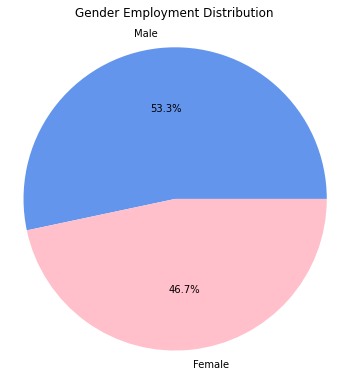

In [19]:
#aus_df, piechart for male and female together
gender_data = [sum(aus_df['EmployedMale']), sum(aus_df['EmployedFemale'])]
labels = ["Male", "Female"]
colors = ["cornflowerblue", "pink"]

fig1,ax1 = plt.subplots(1, 1, figsize=(6,6))
plt.pie(gender_data, labels = labels, autopct='%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('Gender Employment Distribution', pad=20)
plt.show()


In [20]:
#EmploymentTotal ordered by State
state_df = df[['State', 'EmploymentTotal', 'EmployedFullTime', 'EmployedPartTime', 'EmployedMale', 'EmployedFemale']].groupby("State").sum()
state_df.sort_values(by = "EmploymentTotal", ascending=False, inplace=True)
state_df

,EmploymentTotal,EmployedFullTime,EmployedPartTime,EmployedMale,EmployedFemale
State,,,,,
NSW,71000,59100,11900,39100,31900
VIC,62800,48100,14800,32800,30000
QLD,26400,21700,4800,16200,10200
WA,9900,6700,3100,6500,3500
SA,8800,6200,2500,4900,3800
NSW/ACT,4500,3400,1100,2300,2200
TAS,2600,1800,800,1400,1100
NT,800,600,200,400,300


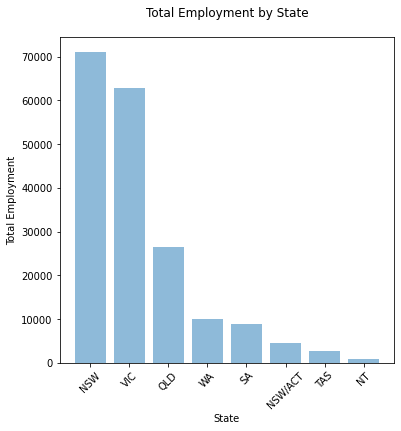

In [21]:
#visualized as barchart
fig2,ax2 = plt.subplots(1, 1, figsize=(6,6))
plt.bar(height=state_df["EmploymentTotal"], x=state_df.index.values, alpha=0.5)
plt.xticks(rotation = 45)
plt.ylabel('Total Employment')
plt.xlabel('State')
ax2.set_title('Total Employment by State', pad=20)
plt.show()

In [22]:
#top 10 EmploymentTotal Region
region_df = df.sort_values(by = "EmploymentTotal", ascending=False)
region_df["label"] = region_df["Region"] + ", " + region_df['State']
region_df[["label", "EmploymentTotal"]].head(10)

,label,EmploymentTotal
161,"Sydney East Metro, NSW",28400
332,"Inner Metropolitan Melbourne, VIC",24500
199,"Sydney North and West, NSW",22600
408,"South Eastern Melbourne and Peninsula, VIC",10300
427,"Western Melbourne, VIC",9500
579,"Somerset, QLD",8700
351,"North Eastern Melbourne, VIC",8600
180,"Sydney Greater West, NSW",8500
465,"Brisbane South East, QLD",6000
674,"Adelaide South, SA",5200


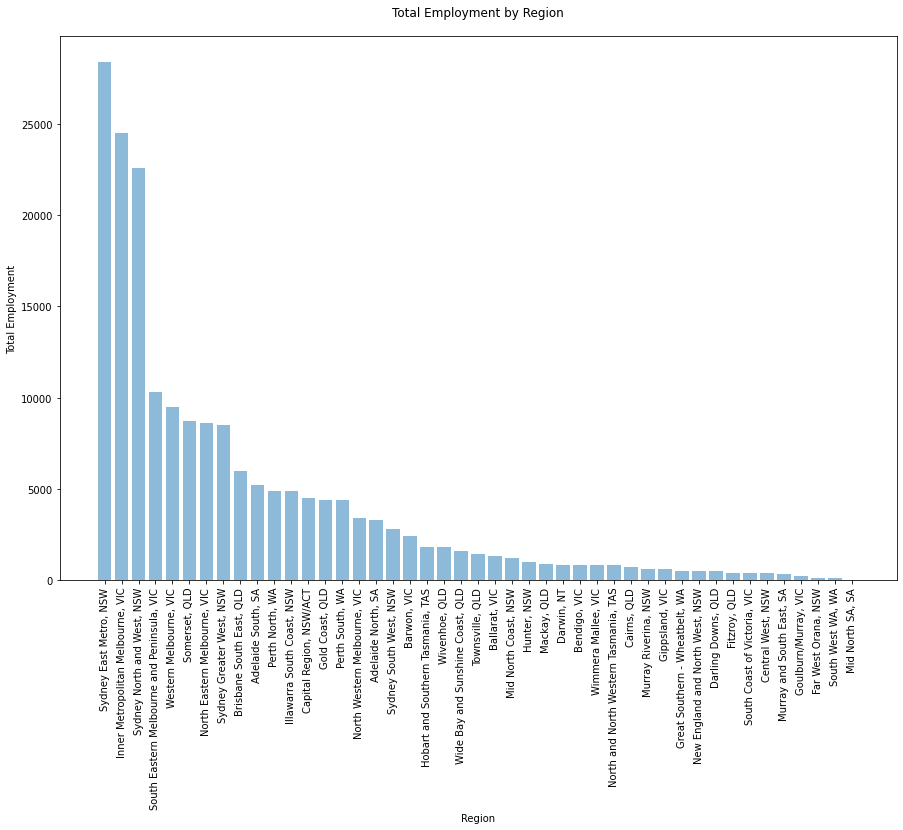

In [23]:
#visualized as barchart
fig3,ax3 = plt.subplots(1, 1, figsize=(15,10))
plt.bar(height=region_df["EmploymentTotal"], x=region_df["label"], alpha=0.5)
plt.xticks(rotation = 90)
plt.ylabel('Total Employment')
plt.xlabel('Region')
ax3.set_title('Total Employment by Region', pad=20)
plt.show()